In [2]:
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import datetime

In [9]:
# import all ETHUSDT OHLC data from Binance
coin='ETH/USDT'
timeframe='1d'
exchange=ccxt.binance()
start_date=0
# start_date = int(datetime.datetime(2017, 1, 1, 1, 1).timestamp() * 1000)

data=pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])

while True:
    response=exchange.fetch_ohlcv(coin, timeframe, since=start_date, limit=1000)
    df=pd.DataFrame(response, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    updateData=pd.merge(data, df, how='outer')
    if len(data)!=len(updateData):
        data=updateData.copy()
        start_date=data['date'].iloc[-1]
    else:
        break
    
data.drop_duplicates(inplace=True)
data.date=pd.to_datetime(data['date'], unit='ms', utc=True, yearfirst=True)
print(data.head(10))

                       date    open    high     low   close      volume
0 2017-08-17 00:00:00+00:00  301.13  312.18  298.00  302.00  7030.71034
1 2017-08-18 00:00:00+00:00  302.00  311.79  283.94  293.96  9537.84646
2 2017-08-19 00:00:00+00:00  293.31  299.90  278.00  290.91  2146.19773
3 2017-08-20 00:00:00+00:00  289.41  300.53  282.85  299.10  2510.13871
4 2017-08-21 00:00:00+00:00  299.10  346.52  294.60  323.29  5219.44542
5 2017-08-22 00:00:00+00:00  321.04  330.41  144.21  309.80  7956.35088
6 2017-08-23 00:00:00+00:00  312.25  324.99  309.41  315.74  8665.72569
7 2017-08-24 00:00:00+00:00  315.74  328.04  314.01  323.42  6753.27192
8 2017-08-25 00:00:00+00:00  323.42  338.28  323.42  327.24  7125.96962
9 2017-08-26 00:00:00+00:00  327.24  335.44  323.41  330.79  4877.68521


In [10]:
# Calculate drawdown
HighestHigh = [data['high'].iloc[0]]
for i in range(1,len(data)):
    if data['high'].iloc[i] >= HighestHigh[-1]:
        HighestHigh.append(data['high'].iloc[i])
    else:
        HighestHigh.append(HighestHigh[-1])
        
data['HighestHigh'] = HighestHigh
data['DrawDown'] = data.apply(lambda row: 0 if row['high']==row['HighestHigh'] else (row['low']-row['HighestHigh'])*100/row['HighestHigh'], axis=1)



In [11]:
# Maximum Drawdown (MDD) 
print("Maximum Drawdown (MDD): {0} %".format(data.loc[data['DrawDown'] == min(data['DrawDown']) ,"DrawDown"].values[0].round(2)))  

Maximum Drawdown (MDD): -94.32 %


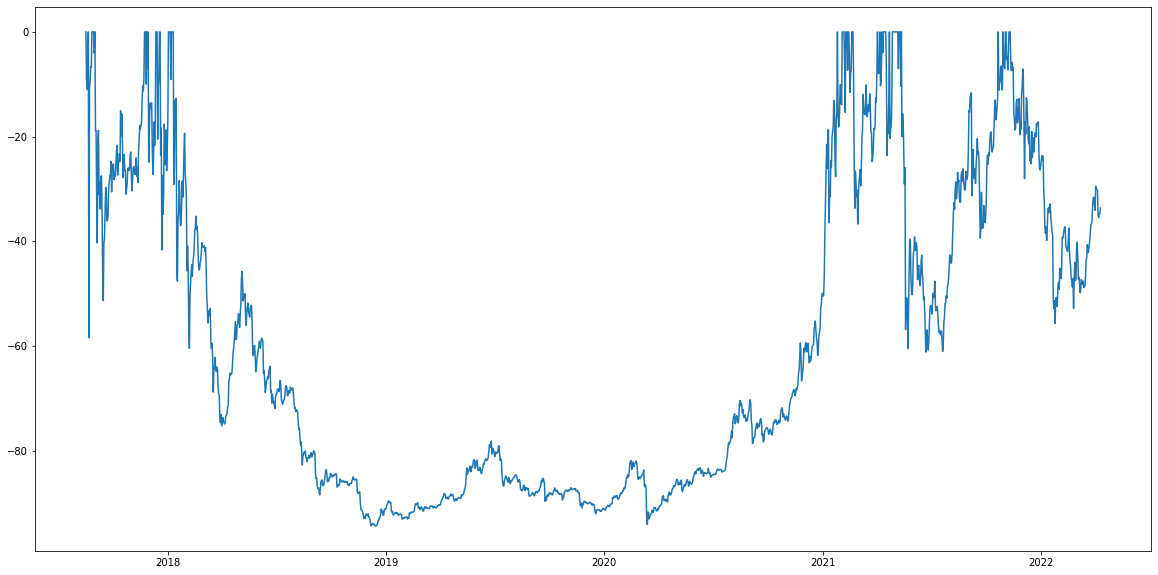

In [12]:
# plot drawdown
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['DrawDown'])